## The Problem Description

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.simplefilter('ignore')

## Importing dataset

In [2]:
data = pd.read_csv('train_v9rqX0R.csv')

## Dataset observation

In [3]:
# Observing first 10 rows
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
# Observing the shape of data
data.shape

(8523, 12)

In [5]:
# Observing the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# checking the null values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Handeling missing values 

 - we can observe that 'Item_Weight' & 'Outlet_Size' are having null values

In [7]:
# for Outlet_Size we can relate that it is highly dependent on the type of Outlet type

mode_of_outlet_size = data.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: x.mode()))
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


 - Here we can observe the type of Outlet and mode of the Outlet sizes of it.

In [8]:
# Filling the null values of Outlet size with mode data of Outlet type.

missing_values = data['Outlet_Size'].isnull()

data.loc[missing_values, 'Outlet_Size'] = data.loc[missing_values, 'Outlet_Type'].apply(lambda x : mode_of_outlet_size[x])

In [9]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


In [10]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

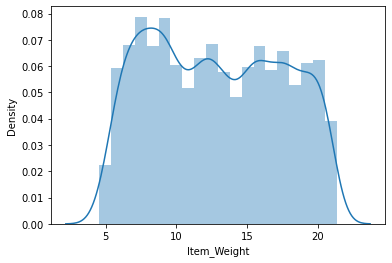

In [11]:
# Handeling missing values for "Item_Weight" wrt "Item_Type"

sns.distplot(data['Item_Weight'])

- data is not normally distributed

In [12]:
median_of_Item_Weight  = data.pivot_table(values = 'Item_Weight', columns = 'Item_Type', aggfunc = (lambda x : x.median()) )
median_of_Item_Weight

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Weight,11.65,10.6,10.695,12.15,13.35,12.85,13.1,10.1,12.15,13.15,12.35,14.5,11.65,13.15,11.8,13.175


In [13]:
missing_values = data['Item_Weight'].isnull()
data.loc[missing_values, 'Item_Weight'] = data.loc[missing_values, 'Item_Type'].apply(lambda x : median_of_Item_Weight[x])

In [14]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,13.150,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


In [15]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Data Analysis

In [16]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.813390,0.066132,140.992782,1997.831867,2181.288914
std,4.241384,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.850000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [17]:
#Checking unique and value counts for each attributes 
for i in data:
    print('----------', i, '----------')
    print(data[i].value_counts())

---------- Item_Identifier ----------
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
---------- Item_Weight ----------
13.150    412
12.150    286
13.100    252
12.850    187
11.650    164
         ... 
8.485       2
7.685       1
9.420       1
6.520       1
5.400       1
Name: Item_Weight, Length: 416, dtype: int64
---------- Item_Fat_Content ----------
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
---------- Item_Visibility ----------
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64
---------- Item_Type ----------
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Froze

In [18]:
# Handling values in "Item_Fat_Content"

data.replace(to_replace = ['LF'] ,value = ['Low Fat'], inplace = True)

In [19]:
data.replace(to_replace = ['low fat'] ,value = ['Low Fat'], inplace = True)
data.replace(to_replace = ['reg'] ,value = ['Regular'], inplace = True)

In [20]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

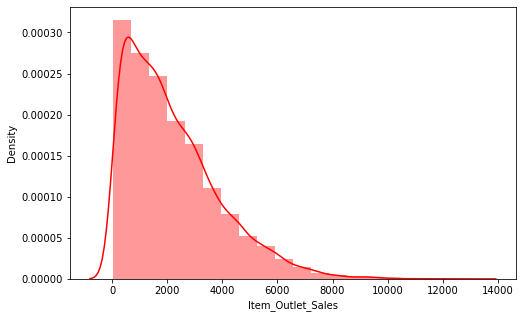

In [21]:
# Let us first analyze the distribution of target variable

plt.figure(figsize = (8, 5))
sns.distplot(data['Item_Outlet_Sales'], color = 'r', bins = 20)
plt.show()

- The target variable ('Sales') is not normally distribute, instead skewed towards right hand

- Target variable contains outliers

<AxesSubplot:>

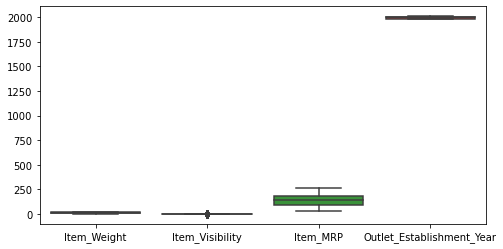

In [22]:
# checking outliers for independent variables
plt.figure( figsize=(8,4))
sns.boxplot(data =data.drop('Item_Outlet_Sales', axis = 1))

- NO features is having outliers except the target variable "Item_Outlet_Sales"

<AxesSubplot:>

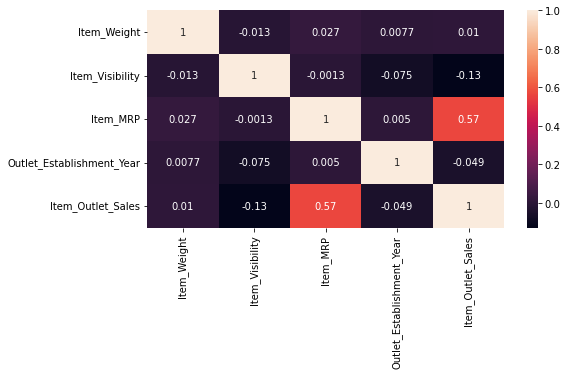

In [23]:
# Checking the correlation between features
plt.figure( figsize=(8,4))
sns.heatmap(data.corr(), annot = True)

- Features like "Item_Visibility" does not contribute much in the sales, this indicate that we need to imporve our storing design so that items can be easily visible and accessible to our customers.
- Customers are not bothered about the Establishment year of the particular Outlet, they are more dragged towards the products.
- We can observe that our sales is maximum dependent on the MRP which is very common.

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

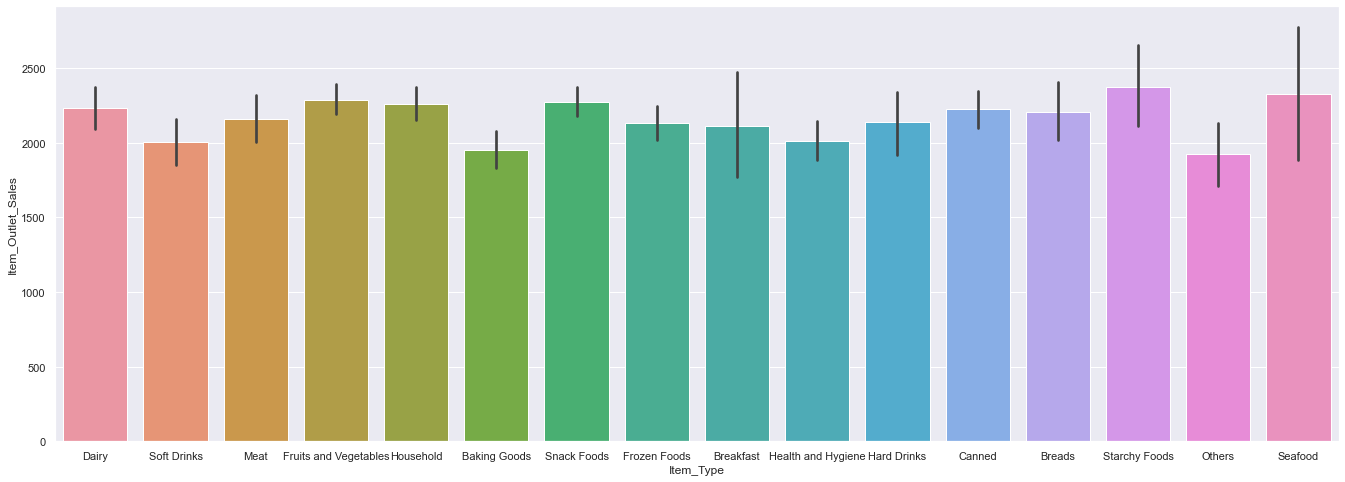

In [24]:
# Checking relation between Item Type and sales contributed.
plt.figure( figsize=(23,8))
sns.set()
sns.barplot(x = 'Item_Type', y = 'Item_Outlet_Sales', data = data)

- All items types in general are producing good sales apart from "Baking Goods" & "Others" in a very small margin.
- There is particularly no need to imporve adding more specific itmes to increase our sales

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

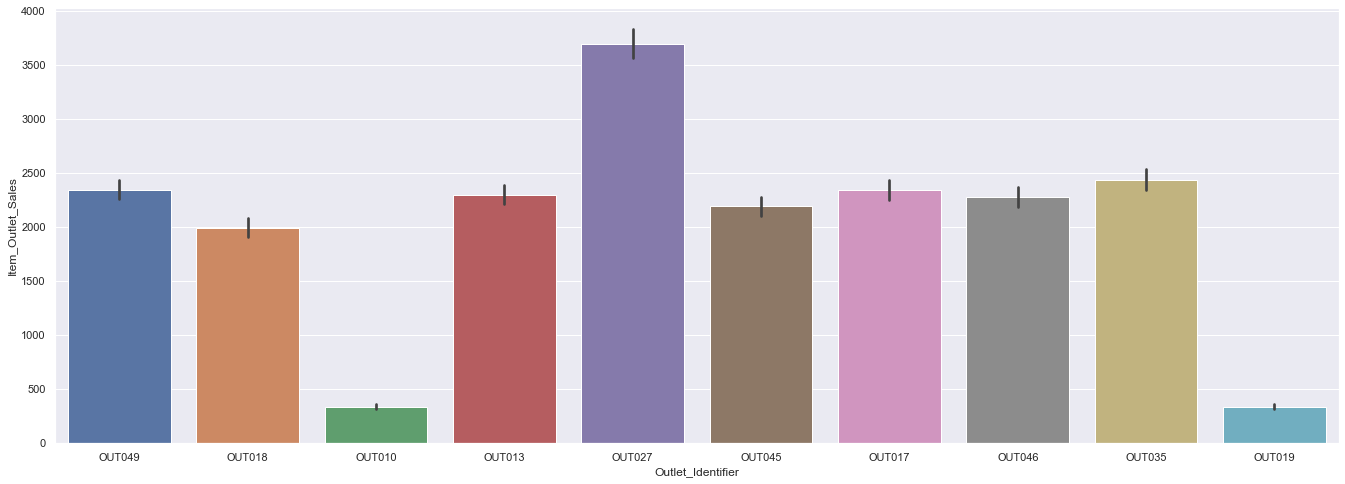

In [25]:
# Checking relation between Outlet Identifier and sales contributed.
plt.figure( figsize=(23,8))
sns.set()
sns.barplot(x = 'Outlet_Identifier', y = 'Item_Outlet_Sales', data = data)

In [26]:
data.pivot_table(values = 'Outlet_Location_Type', index = 'Outlet_Identifier' , aggfunc = (lambda x : x.mode()))

,Outlet_Location_Type
Outlet_Identifier,
OUT010,Tier 3
OUT013,Tier 3
OUT017,Tier 2
OUT018,Tier 3
OUT019,Tier 1
OUT027,Tier 3
OUT035,Tier 2
OUT045,Tier 2
OUT046,Tier 1


- Outlet "OUT027" contributing towards max sales which is actually situated on Tier 3 place
- Outlets "OUT010" & "OUT019" are contributing min sales which are located on Tier 3 and Tier 1 places respectively 

- This certenly defines that the location type is not much contributing towards max sales.


<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

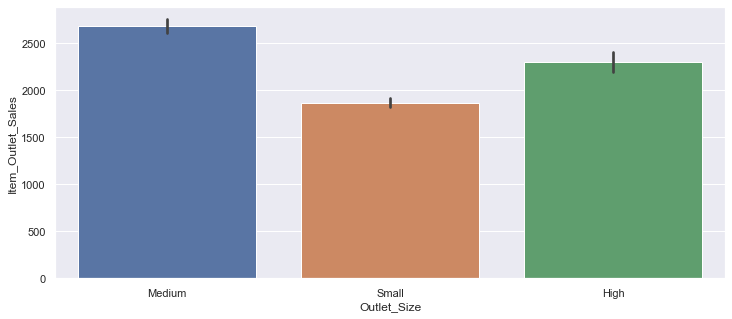

In [27]:
# Checking relation between Outlet Size and sales contributed.
plt.figure( figsize=(12,5))
sns.set()
sns.barplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = data)



- Medium Outlet size followed by high size contribute more towards the sales

## Outliers Handeling

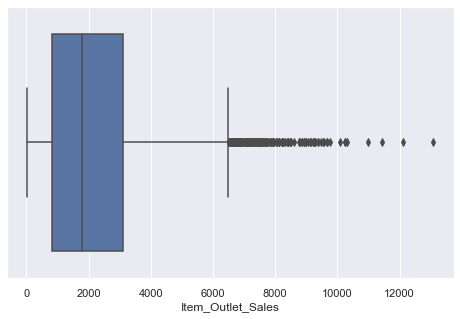

In [28]:
# Check Outliers in the sales column

plt.figure(figsize = (8, 5))
sns.boxplot(data['Item_Outlet_Sales'])
plt.show()

- As the data is not normally distribute so performing IQR


In [29]:
Q1 = data.Item_Outlet_Sales.quantile(0.25)
Q3 = data.Item_Outlet_Sales.quantile(0.75)

IQR = Q3 -Q1
data = data[(data.Item_Outlet_Sales >= Q1-3*IQR) & (data.Item_Outlet_Sales <= Q3+3*IQR) ]

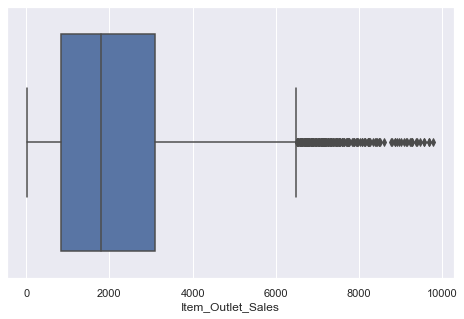

In [30]:
plt.figure(figsize = (8, 5))
sns.boxplot(data['Item_Outlet_Sales'])
plt.show()

- we can observe the number of outliers reduced 

# Feature Engineering 

In [31]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [32]:
cat_data = data.select_dtypes(include = 'object')

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()

for i in cat_data.columns:
    data[i] = le.fit_transform(data[i])

# Feature Selection

<AxesSubplot:>

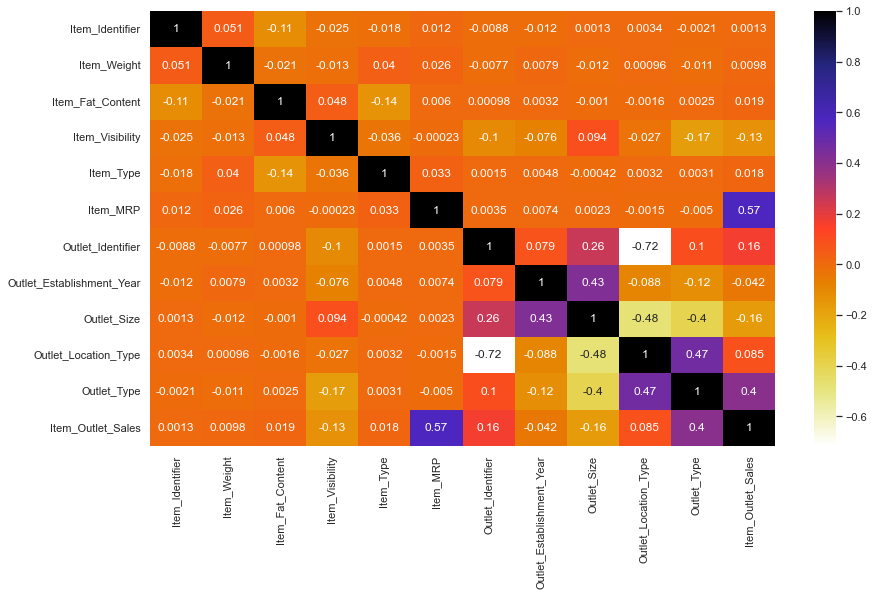

In [35]:
plt.figure(figsize = (14,8))
sns.heatmap(data.corr(), annot = True, cmap = plt.cm.CMRmap_r)

In [63]:
# Feature Selection on the basis on Chi-Square Test

from sklearn.feature_selection import chi2

In [64]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8515 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8515 non-null   int32  
 1   Item_Weight                8515 non-null   float64
 2   Item_Fat_Content           8515 non-null   int32  
 3   Item_Visibility            8515 non-null   float64
 4   Item_Type                  8515 non-null   int32  
 5   Item_MRP                   8515 non-null   float64
 6   Outlet_Identifier          8515 non-null   int32  
 7   Outlet_Establishment_Year  8515 non-null   int64  
 8   Outlet_Size                8515 non-null   int32  
 9   Outlet_Location_Type       8515 non-null   int32  
 10  Outlet_Type                8515 non-null   int32  
 11  Item_Outlet_Sales          8515 non-null   int32  
dtypes: float64(3), int32(8), int64(1)
memory usage: 598.7 KB


In [66]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [78]:
x = data[['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']]
y = data['Item_Outlet_Sales']

In [79]:
f_score = chi2(x,y)

In [83]:
p_value = pd.Series(f_score[1], index = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'])

# sorting  p_values

p_value = p_value.sort_values(ascending = True)

In [85]:
p_value

Item_Identifier               0.000000e+00
Item_Type                     0.000000e+00
Item_MRP                      0.000000e+00
Outlet_Identifier            3.176059e-188
Item_Weight                   1.844237e-52
Outlet_Type                   1.000000e+00
Item_Fat_Content              1.000000e+00
Item_Visibility               1.000000e+00
Outlet_Establishment_Year     1.000000e+00
Outlet_Size                   1.000000e+00
Outlet_Location_Type          1.000000e+00
dtype: float64

## Acc to  chi-square test 

- Null Hypothesis - features are independent to each other , no relationship btw two varibles.
- Alternate Hypothesis - features are dependent , relationship btw the variables


- if p value <=0.05, we reject null hypothesis, which means there is some relationship btw input and target variable 
- vice vesa for alternate hypothesis

In [87]:
cols = []

for i in p_value.index:
    if p_value[i] <=0.05:
        print(i, '------', 'Reject Null Hypo')
    else:
        print(i, '------', 'Accept Null Hypo')
        cols.append(i)

Item_Identifier ------ Reject Null Hypo
Item_Type ------ Reject Null Hypo
Item_MRP ------ Reject Null Hypo
Outlet_Identifier ------ Reject Null Hypo
Item_Weight ------ Reject Null Hypo
Outlet_Type ------ Accept Null Hypo
Item_Fat_Content ------ Accept Null Hypo
Item_Visibility ------ Accept Null Hypo
Outlet_Establishment_Year ------ Accept Null Hypo
Outlet_Size ------ Accept Null Hypo
Outlet_Location_Type ------ Accept Null Hypo


In [88]:
# droping features that will not add any value to my model 

data.drop(labels = cols, axis = 1, inplace = True)

In [89]:
data.head()

,Item_Identifier,Item_Weight,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales
0,156,9.30,4,249.8092,9,3735
1,8,5.92,14,48.2692,3,443
2,662,17.50,10,141.6180,9,2097
3,1121,19.20,6,182.0950,0,732
4,1297,8.93,9,53.8614,1,994


## Feature Scaling

In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [94]:
num_vars = ['Item_Identifier', 'Item_Weight', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Item_Outlet_Sales']

data[num_vars] = scaler.fit_transform(data[num_vars])

In [95]:
data.head()

,Item_Identifier,Item_Weight,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales
0,0.100128,0.282525,0.266667,0.927507,1.000000,0.379848
1,0.005135,0.081274,0.933333,0.072068,0.333333,0.042069
2,0.424904,0.770765,0.666667,0.468288,1.000000,0.211779
3,0.719512,0.871986,0.400000,0.640093,0.000000,0.071722
4,0.832478,0.260494,0.600000,0.095805,0.111111,0.098605


## Linear Regression Model Building

In [105]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Item_Outlet_Sales'],
      dtype='object')

In [109]:
## OLS Model

import statsmodels.api as smf
X = data[['Item_Identifier', 'Item_Weight', 'Item_Type', 'Item_MRP','Outlet_Identifier']]
y = data['Item_Outlet_Sales']

In [110]:
X = smf.add_constant(X)
model = smf.OLS(y,X).fit()

In [111]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     910.6
Date:                Sun, 11 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:40:30   Log-Likelihood:                 4686.9
No. Observations:                8515   AIC:                            -9362.
Df Residuals:                    8509   BIC:                            -9319.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0028      0.006      0.461      0.645      -0.009       0.015
Item_Identifier      -0.0025      0.005     -0.473      0.636      -0.013       0.008
Item_Weight          -0.0025      0.006     -0.414      0.679      -0.014       0.009
Item_Type            -0.0007      0.005     -0.127      0.899      -0.011       0.010
Item_MRP              0.3713      0.006     64.752      0.000       0.360       0.383
Outlet_Identifier     0.0892      0.005     18.598      0.000       0.080       0.099
==============================================================================
Omnibus:                      667.128   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1133.697
Skew:                           0.583   Prob(JB):                    6.62e-247
Kurtosis:                       4.355   Cond. No.                         7.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
X.iloc[:,1:].corr()

,Item_Identifier,Item_Weight,Item_Type,Item_MRP,Outlet_Identifier
Item_Identifier,1.000000,0.051116,-0.018174,0.012432,-0.008779
Item_Weight,0.051116,1.000000,0.040437,0.026390,-0.007698
Item_Type,-0.018174,0.040437,1.000000,0.032865,0.001540
Item_MRP,0.012432,0.026390,0.032865,1.000000,0.003489
Outlet_Identifier,-0.008779,-0.007698,0.001540,0.003489,1.000000


### From this observation we conclude that their is not much co-relation exists among variables


## Model Building 

In [125]:
X= data.drop('Item_Outlet_Sales', axis = 1)
y = data['Item_Outlet_Sales']

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [127]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6812, 5), (1703, 5), (6812,), (1703,))

In [128]:
from sklearn.linear_model import LinearRegression

# Fit the training data to Linear Regression Model

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [132]:
# Make Prediction on test data

y_pred_test = reg.predict(X_test)

In [134]:
# Make prdiction for training set 

y_pred_train = reg.predict(X_train)

In [136]:
y_pred_train.shape

(6812,)

## Model Evaluation

In [130]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.10125192453836994
Mean Squared Error: 0.01846044788051657
Root Mean Squared Error: 0.1358692308085851


### Apply Regularizers to avoid any chance of overfitting

In [146]:
# Ridge Regression

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [147]:
# Make Prediction on test data

y_pred_ridge = ridge.predict(X_test)

In [148]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ridge))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ridge))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))

Mean Absolute Error: 0.10125330205000355
Mean Squared Error: 0.018459345808441323
Root Mean Squared Error: 0.13586517511283502


In [149]:
# Lasso Regression

from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [150]:
# Make Prediction on test data

y_pred_l = lasso.predict(X_test)

In [151]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_l))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_l))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_l)))

Mean Absolute Error: 0.1331545953792009
Mean Squared Error: 0.028064356789220903
Root Mean Squared Error: 0.16752419762297296


In [152]:
data.head()

,Item_Identifier,Item_Weight,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales
0,0.100128,0.282525,0.266667,0.927507,1.000000,0.379848
1,0.005135,0.081274,0.933333,0.072068,0.333333,0.042069
2,0.424904,0.770765,0.666667,0.468288,1.000000,0.211779
3,0.719512,0.871986,0.400000,0.640093,0.000000,0.071722
4,0.832478,0.260494,0.600000,0.095805,0.111111,0.098605


## Testing a Predictive System

In [153]:
input_data = (0.100128, 0.282525, 0.266667, 0.927507, 1)

input_data_as_array = np.asarray(input_data)
input_data_reshaped = input_data_as_array.reshape(1, -1)

prediction = reg.predict(input_data_reshaped)

print('The total sale is:', prediction[0])

The total sale is: 0.43822157920210103
